# Cyberbullying Detection

Drive mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

In [ ]:
path = "/content/drive/MyDrive/FYP_New/Dataset/cyberbullying_tweets.csv"

# Imports
---

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

# Loading the Dataset
---

In [ ]:
df = pd.read_csv(path, nrows = 20000)
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
19995,I am Christian who definitely does not support...,religion
19996,@yousufpoosuf @RKingLive2Dance @izrinhariri No...,religion
19997,How can you say Barack Obama was the best pres...,religion
19998,Another Mentally ill asylum seeker. WTHell do ...,religion


In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df.tail()

,tweet_text,cyberbullying_type
19995,I am Christian who definitely does not support...,religion
19996,@yousufpoosuf @RKingLive2Dance @izrinhariri No...,religion
19997,How can you say Barack Obama was the best pres...,religion
19998,Another Mentally ill asylum seeker. WTHell do ...,religion
19999,shame on you. Bhagat singh did not kill innoce...,religion


In [ ]:
df.shape

(20000, 2)

# EDA
---

# 1. Handling Null Values

In [ ]:
df.isna().any()

,0
tweet_text,False
cyberbullying_type,False


In [ ]:
df.isna().sum()

,0
tweet_text,0
cyberbullying_type,0


# 2. Handling Duplicate Values

In [ ]:
df.nunique()

,0
tweet_text,19915
cyberbullying_type,3


In [ ]:
df['tweet_text'].nunique()

19915

# 3. Class Distributions

In [ ]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
gender,7973
not_cyberbullying,7945
religion,4082


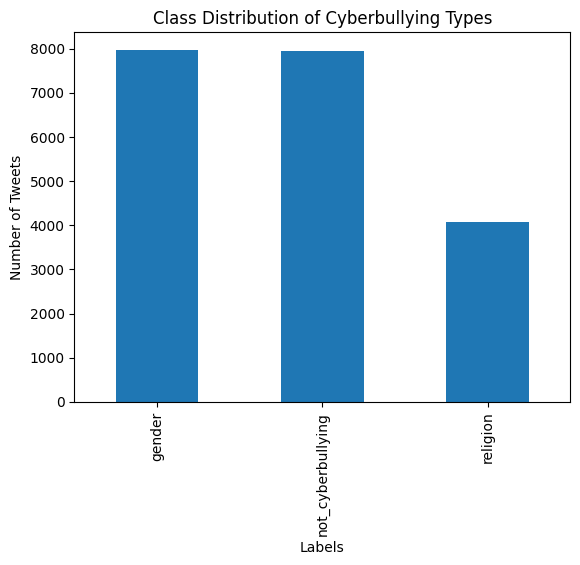

In [ ]:
# Create a bar plot of the class distribution
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

# 4. Word Count

In [ ]:
from collections import Counter
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['tweet_text'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()

In [ ]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [ ]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 5256),
 ('rape', 2962),
 ('gay', 2507),
 ('RT', 2103),
 ('jokes', 2038),
 ('like', 1739),
 ('people', 1336),
 ("I'm", 1167),
 ('&amp;', 1117),
 ('joke', 1114),
 ('The', 1021),
 ('call', 955),
 ('u', 942),
 ('You', 932),
 ('think', 896),
 ('get', 863),
 ('make', 862),
 ('women', 811),
 ('know', 739),
 ('one', 738),
 ('Muslim', 733),
 ('Muslims', 728),
 ('female', 703),
 ('sexist', 668),
 ('-', 650),
 ('And', 638),
 ('would', 637),
 ('jokes,', 615),
 ('Christian', 605),
 ('woman', 571),
 ('If', 561),
 ('support', 560),
 ('say', 542),
 ('even', 523),
 ('want', 520),
 ('see', 512),
 ('right', 504),
 ('men', 502),
 ('idiots', 488),
 ('never', 483),
 ('still', 469),
 ('But', 467),
 ('made', 458),
 ('go', 456),
 ('really', 451),
 ('idiot', 447),
 ('This', 445),
 ('A', 444),
 ('So', 443),
 ('making', 443),
 ('.', 430),
 ('Islamic', 429),
 ('bitch', 428),
 ('need', 418),
 ("can't", 412),
 ('hate', 410),
 ('Rape', 409),
 ('Kat', 399),
 ('What', 390),
 ('They', 386),
 ('said', 384),
 ('bul

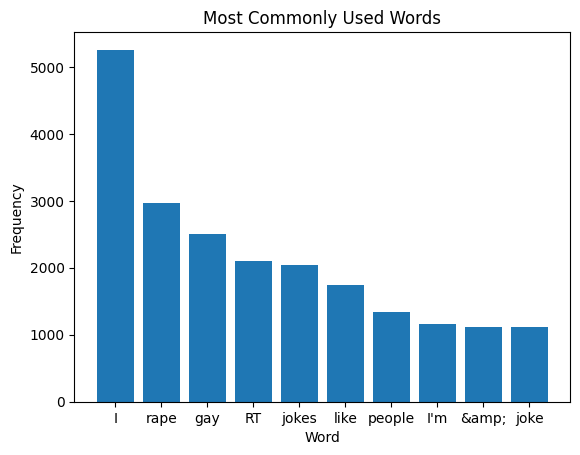

In [ ]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# Visualizations
---

# 1. Wordclouds

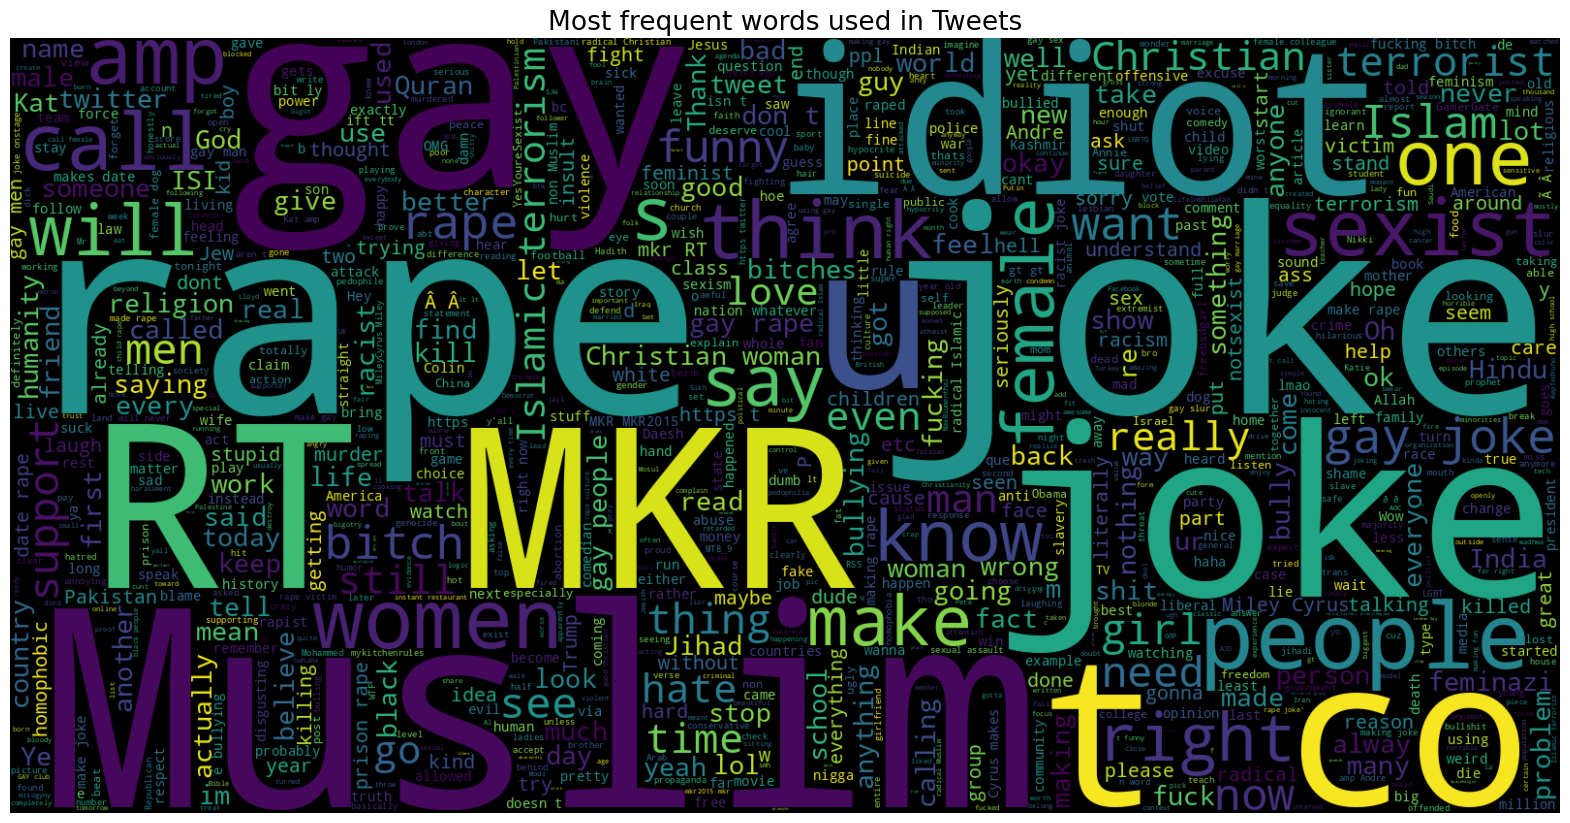

In [ ]:
from wordcloud import WordCloud

text = ' '.join([word for word in df['tweet_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Tweets', fontsize=19)
plt.show()

# 2. Sentiment Analysis Plot

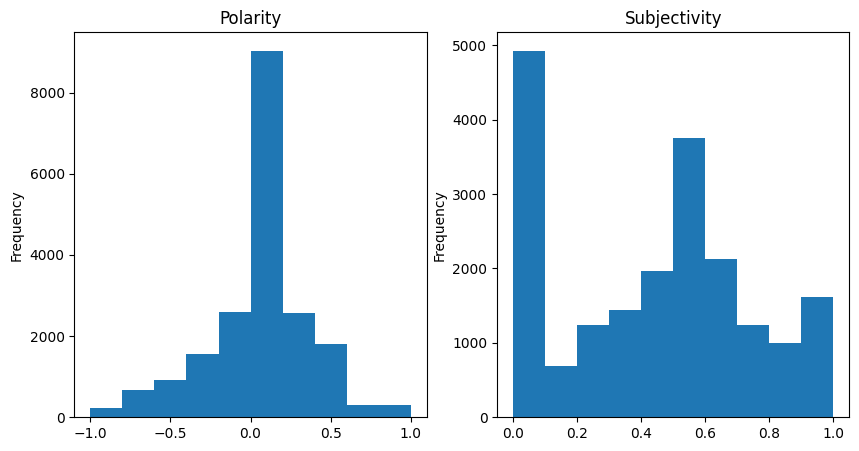

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# perform sentiment analysis on each text in DataFrame
sentiment_scores = []
for text in df['tweet_text']:
    analysis = TextBlob(text)
    sentiment_scores.append((analysis.sentiment.polarity, analysis.sentiment.subjectivity))

# create DataFrame with sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores, columns=['polarity', 'subjectivity'])

# plot distribution of sentiment scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sentiment_df['polarity'].plot(kind='hist', ax=axes[0], title='Polarity')
sentiment_df['subjectivity'].plot(kind='hist', ax=axes[1], title='Subjectivity')
plt.show()

# 3. Named Entity Recognition (NER) Plot

In [ ]:
import spacy
from spacy import displacy

In [ ]:
#sample text
text = df['tweet_text'].iloc[4]

#load pre-trained NER model
nlp = spacy.load('en_core_web_sm')

#perform named entity recognition
doc = nlp(text)

#visualize named entities
displacy.render(doc, style='ent', jupyter=True)

# 4. Part-of-Speech (POS) Tagging Plot

In [ ]:
import spacy
from spacy import displacy

#sample text
text = df['tweet_text'].iloc[1]

#load pre-trained POS tagging model
nlp = spacy.load('en_core_web_sm')

#perform POS tagging
doc = nlp(text)

#visualize POS tagging
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

# 5. Topic Modeling Visualization

In [ ]:
# !pip install -q pyLDAvis

In [ ]:
# import gensim
# import pyLDAvis
# from pyLDAvis import *
# import pyLDAvis.gensim as gensimvis

# # Preprocessing
# tokens = [[word for word in sentence.split()] for sentence in df['tweet_text']]
# dictionary = gensim.corpora.Dictionary(tokens)
# corpus = [dictionary.doc2bow(token) for token in tokens]

# # Topic Modeling
# num_topics = 10
# lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# # Visualization
# pyLDAvis.enable_notebook()
# vis = gensimvis.prepare(lda_model, corpus, dictionary, n_jobs=1)
# vis

# Natural Language Processing
---

# 1. Data Cleaning

In [ ]:
import nltk
nltk.download('punkt_tab')

# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)

    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()

    # Remove URLs, mentions, and hashtags from the text
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]

    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    # Join the words back into a string
    text = ' '.join(words)
    return text

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['tweet_text'].progress_apply(clean_text)

  0%|          | 0/20000 [00:00<?, ?it/s]

CPU times: user 46.6 s, sys: 7 s, total: 53.6 s
Wall time: 55 s


# 2. Feature Extraction

In [ ]:
# Create the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['cyberbullying_type']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Model
---

# 1. Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 2. Predictions

In [ ]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)
y_pred

array(['gender', 'not_cyberbullying', 'gender', ..., 'gender',
       'not_cyberbullying', 'gender'], dtype=object)

# 3. Accuracy Score

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.914


# 4. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1424,  175,    3],
       [  70, 1499,   31],
       [   9,   56,  733]])

<Axes: >

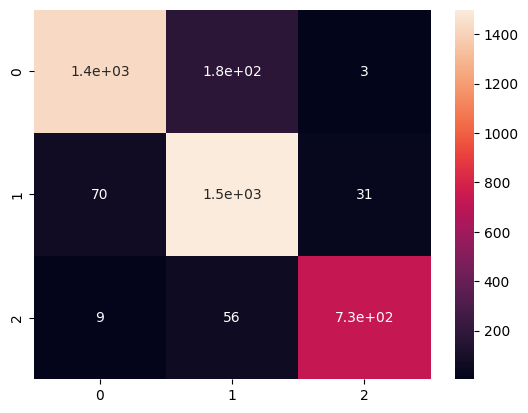

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

# 5. Classification Report

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                   precision    recall  f1-score   support

           gender       0.95      0.89      0.92      1602
not_cyberbullying       0.87      0.94      0.90      1600
         religion       0.96      0.92      0.94       798

         accuracy                           0.91      4000
        macro avg       0.92      0.91      0.92      4000
     weighted avg       0.92      0.91      0.91      4000



In [ ]:
import pickle

# Save the model to a file
filename = 'logistic_regression_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

# Load the saved model from the file
loaded_model = pickle.load(open(filename, 'rb'))

with open('count_vectorizer.pkl', 'wb') as file:
    pickle.dump(cv, file)

Prediction code

In [ ]:
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Load the saved model
filename = 'logistic_regression_model.pkl'  # Update with model's filename
loaded_model = pickle.load(open(filename, 'rb'))

# Load the CountVectorizer used during training
# (Assuming you saved it as 'count_vectorizer.pkl')
cv_filename = 'count_vectorizer.pkl'  # Update with CountVectorizer filename
cv = pickle.load(open(cv_filename, 'rb'))

# Function to clean and preprocess new text
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

# Function to predict cyberbullying type
def predict_cyberbullying_type(text):
    # Clean the input text
    cleaned_text = clean_text(text)
    # Transform the text using the loaded CountVectorizer
    text_vector = cv.transform([cleaned_text])
    # Make the prediction using the loaded model
    prediction = loaded_model.predict(text_vector)[0]
    return prediction

In [ ]:
# Example usage:
new_text = "This is an example tweet to test the model"
predicted_type = predict_cyberbullying_type(new_text)
print("Predicted Cyberbullying Type:", predicted_type)

Predicted Cyberbullying Type: gender


In [ ]:
# Example usage:
new_text = "love ya"
predicted_type = predict_cyberbullying_type(new_text)
print("Predicted Cyberbullying Type:", predicted_type)

Predicted Cyberbullying Type: not_cyberbullying


In [ ]:
# Example usage:
new_text = "fu8k god"
predicted_type = predict_cyberbullying_type(new_text)
print("Predicted Cyberbullying Type:", predicted_type)

Predicted Cyberbullying Type: not_cyberbullying


In [ ]:
# Example usage:
new_text = "Cyberbullying is just a word"
predicted_type = predict_cyberbullying_type(new_text)
print("Predicted Cyberbullying Type:", predicted_type)

Predicted Cyberbullying Type: not_cyberbullying
